# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

First data structure we will see.

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 

We will see that every column in a data frame is a serie.


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", '\n', xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

# subset of a series is still a series

xs: 
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')                   # I can apply filters
print (np.exp(xs),'\n')
print (np.mean(xs), np.std(xs), '\n')    # I can perform data contractions

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
print(pd.Series(d))



b         1
a       cat
c    [2, 3]
dtype: object


A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]        
print(s, '\n')

# NaN where solo una delle due liste contiene quel indice
# You don't want to mix indexes

a = pd.Series(np.random.randn(5), index=[i for i in range(5)])
b = pd.Series(np.random.randn(7), index=[i for i in range(7)])
c = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(a, '\n')
print(b, '\n')
print(a+b, '\n')
print(a+c, '\n')

a    0.657184
b    0.068805
c   -0.830534
d    0.403243
e    0.260683
dtype: float64
a         NaN
b    0.137609
c   -1.661068
d    0.806485
e         NaN
dtype: float64 

0   -0.184997
1    0.127719
2   -1.003028
3   -1.024326
4    0.095545
dtype: float64 

0   -1.056792
1   -0.380978
2    1.515656
3    0.002890
4   -1.004563
5   -0.873059
6   -0.048843
dtype: float64 

0   -1.241789
1   -0.253259
2    0.512628
3   -1.021436
4   -0.909019
5         NaN
6         NaN
dtype: float64 

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64 



### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
import datetime as dt   # importato datetime module

# how to create adate object
data = dt.date(1997,12,16)
print(data)
print(data.year, '\n')

# by deafault the data format is yyyy-mm-dd but we can specify another data format
# for example if I want Day-name, Month-name, Year
print(data.strftime('%A, %B %d, %Y'), '\n')

# passare da una data scritta in maniera diversa ad una data
data_di_nascita = '16 Dec 1997'
data_di_nascita_datetime = dt.datetime.strptime(data_di_nascita, '%d %b %Y')
print(data_di_nascita_datetime, '\n')

print(dt.datetime.today())

1997-12-16
1997 

Tuesday, December 16, 1997 

1997-12-16 00:00:00 

2022-12-28 16:12:49.959703


In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
print(date)
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

date = '16/12/1997 13:40:00'
days = pd.date_range(date, periods=10, freq='d')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

# they can be used as indexes for series, they are called time series

2022-12-28
2022-11-30 10:45:10.000015
Nov 30 2022
30/11/2022 10:45:00
DatetimeIndex(['1997-12-16 13:40:00', '1997-12-17 13:40:00',
               '1997-12-18 13:40:00', '1997-12-19 13:40:00',
               '1997-12-20 13:40:00', '1997-12-21 13:40:00',
               '1997-12-22 13:40:00', '1997-12-23 13:40:00',
               '1997-12-24 13:40:00', '1997-12-25 13:40:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['1997-12-16 13:40:00', '1997-12-16 13:40:01',
               '1997-12-16 13:40:02', '1997-12-16 13:40:03',
               '1997-12-16 13:40:04', '1997-12-16 13:40:05',
               '1997-12-16 13:40:06', '1997-12-16 13:40:07',
               '1997-12-16 13:40:08', '1997-12-16 13:40:09',
               ...
               '1997-12-16 14:39:50', '1997-12-16 14:39:51',
               '1997-12-16 14:39:52', '1997-12-16 14:39:53',
               '1997-12-16 14:39:54', '1997-12-16 14:39:55',
               '1997-12-16 14:39:56', '1997-12-16 14:39:57',
        

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))
tstamp = pd.Timestamp('2022-11-30')
tstamp = pd.Timestamp(1997,12,16)
print(tstamp)

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
# Pandas to_datetime() method helps to convert string Date time into Python Date time object.
ts = pd.to_datetime('2010/Dec/Mon', format='%Y/%b/%a')
print (type(ts))
print (ts.value)

ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1997-12-16 00:00:00
882230400000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1291161600000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 2, len(days)), index=days)
# Extracting elements
print(tseries)
print (tseries[0:4], '\n')
print (tseries['1997-12-19':'1997-12-23'], '\n') # Note - includes end time
                                                 # here i have specified the range between the indexes


1997-12-16 13:40:00     7.644966
1997-12-17 13:40:00    13.347676
1997-12-18 13:40:00     9.766109
1997-12-19 13:40:00    10.042959
1997-12-20 13:40:00     8.022936
1997-12-21 13:40:00    12.548332
1997-12-22 13:40:00    10.710004
1997-12-23 13:40:00    11.121701
1997-12-24 13:40:00    12.814925
1997-12-25 13:40:00    10.308200
Freq: D, dtype: float64
1997-12-16 13:40:00     7.644966
1997-12-17 13:40:00    13.347676
1997-12-18 13:40:00     9.766109
1997-12-19 13:40:00    10.042959
Freq: D, dtype: float64 

1997-12-19 13:40:00    10.042959
1997-12-20 13:40:00     8.022936
1997-12-21 13:40:00    12.548332
1997-12-22 13:40:00    10.710004
1997-12-23 13:40:00    11.121701
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

DataFrame is a collection of series. These series must have the same indexes (raws). Each columns of the data frame can have a name.

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=5
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df_1 = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
print('Tabella 1', '\n', df_1, '\n')

df_2 = pd.DataFrame(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]), index=dates, columns=['A','B','C','D'])
print('Tabella 1', '\n', df_2, '\n')

df_3 = pd.DataFrame(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]), columns=['A','B','C','D'])
print('Tabella 1', '\n', df_3, '\n')

df_4 = pd.DataFrame(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]), index=dates)
print('Tabella 1', '\n', df_4, '\n')

# se non specifico il nome degli indici o delle colonne gli viene assegnato in automatico (guarda tebelle 3 e 4)

Tabella 1 
                             A         B         C         D
2022-11-30 10:45:00  0.724162  2.427936 -0.328179 -1.067248
2022-11-30 11:45:00 -1.425948 -0.744233  0.941208 -2.158127
2022-11-30 12:45:00  0.591708  0.081473  0.144473 -0.166189
2022-11-30 13:45:00  1.481996  0.558498  1.968981  0.722628
2022-11-30 14:45:00 -0.899125 -0.470459  1.989471  0.509485 

Tabella 1 
                       A   B   C   D
2022-11-30 10:45:00   1   2   3   4
2022-11-30 11:45:00   5   6   7   8
2022-11-30 12:45:00   9  10  11  12
2022-11-30 13:45:00  13  14  15  16
2022-11-30 14:45:00  17  18  19  20 

Tabella 1 
     A   B   C   D
0   1   2   3   4
1   5   6   7   8
2   9  10  11  12
3  13  14  15  16
4  17  18  19  20 

Tabella 1 
                       0   1   2   3
2022-11-30 10:45:00   1   2   3   4
2022-11-30 11:45:00   5   6   7   8
2022-11-30 12:45:00   9  10  11  12
2022-11-30 13:45:00  13  14  15  16
2022-11-30 14:45:00  17  18  19  20 



or by means of a dictionary:


In [12]:
# another way to cinstruct my dictionary, by means of a dictionary
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }, index=np.arange(2,6)
    )
print(df2)

# check what happens if D and E had different lenghts 

# I try and if D and E have different lenghts it returns an error

     A          B    C   D      E
2  1.0 2013-01-02  1.0   7   test
3  1.0 2013-01-02  1.0   8  train
4  1.0 2013-01-02  NaN   9   test
5  1.0 2013-01-02  NaN  10  train


### Viewing Data

In [13]:
entries=10
nomi_colonne = ['A','B','C','D']
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=nomi_colonne)
print('Tabella 1', '\n', df, '\n')

Tabella 1 
                             A         B         C         D
2022-11-30 10:45:00  1.335944 -0.338795  0.085237  0.249198
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184 -1.106478
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  0.471248
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  0.590748
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  0.314003
2022-11-30 15:45:00 -2.437061 -1.578206  0.573463  0.773572
2022-11-30 16:45:00 -0.350943  0.903955 -1.598259  0.312279
2022-11-30 17:45:00 -1.064685  0.754864 -0.586987  0.183834
2022-11-30 18:45:00  0.799956 -0.807630  1.771642 -0.663860
2022-11-30 19:45:00 -0.159505  0.180273  0.142219  0.741262 



In [14]:
df.head(2)

,A,B,C,D
2022-11-30 10:45:00,1.335944,-0.338795,0.085237,0.249198
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,-1.106478


In [15]:
df.tail(4)

,A,B,C,D
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,-0.663860
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262


In [16]:
df.index

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
df.columns     # returns the na,me of the colums

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values       # extract tha data and obtain, essentialy a numpy array, removing indexes and nome of the columns

array([[ 1.33594394, -0.33879549,  0.08523726,  0.24919765],
       [-0.92120879, -0.8836075 , -0.12418413, -1.10647752],
       [-1.09259015, -1.85691187,  0.76800374,  0.4712483 ],
       [-0.70340543, -0.328106  , -0.20077886,  0.59074764],
       [ 0.54979801, -0.35687001, -0.5118014 ,  0.31400289],
       [-2.43706102, -1.57820632,  0.57346305,  0.7735721 ],
       [-0.35094318,  0.90395478, -1.59825926,  0.31227926],
       [-1.06468506,  0.75486422, -0.58698654,  0.18383356],
       [ 0.79995571, -0.8076298 ,  1.77164247, -0.66386036],
       [-0.15950512,  0.18027315,  0.14221915,  0.74126168]])

In [19]:
df.describe()
# every column is a variable and using describe you can obtain several infos about the columns

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.404370,-0.431103,0.031856,0.186581
std,1.097997,0.899545,0.900087,0.608078
min,-2.437061,-1.856912,-1.598259,-1.106478
25%,-1.028816,-0.864613,-0.434046,0.200175
50%,-0.527174,-0.347833,-0.019473,0.313141
75%,0.372472,0.053178,0.465652,0.560873
max,1.335944,0.903955,1.771642,0.773572


In [20]:
df.T    # take the transpose, but tipically you don't use it because tipically the np array inside the table has
        # few columns and lots of raws

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,1.335944,-0.921209,-1.092590,-0.703405,0.549798,-2.437061,-0.350943,-1.064685,0.799956,-0.159505
B,-0.338795,-0.883607,-1.856912,-0.328106,-0.356870,-1.578206,0.903955,0.754864,-0.807630,0.180273
C,0.085237,-0.124184,0.768004,-0.200779,-0.511801,0.573463,-1.598259,-0.586987,1.771642,0.142219
D,0.249198,-1.106478,0.471248,0.590748,0.314003,0.773572,0.312279,0.183834,-0.663860,0.741262


In [21]:
df.sort_index(axis=0,ascending=True) # mette in ordine le righe in base all'indice; dal piu' basso al piu' alto

,A,B,C,D
2022-11-30 10:45:00,1.335944,-0.338795,0.085237,0.249198
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,-1.106478
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,0.471248
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,0.590748
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,0.314003
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,0.773572
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,-0.663860
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262


In [22]:
df.sort_index(axis=0,ascending=False) # mette in ordine le righe in base all'indice; dal piu' alto al piu' basso

,A,B,C,D
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,-0.663860
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,0.773572
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,0.314003
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,0.590748
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,0.471248
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,-1.106478
2022-11-30 10:45:00,1.335944,-0.338795,0.085237,0.249198


In [23]:
df.sort_values(by="C") # mette in ordine le righe in base ai valori contenuti nella colonna 'C';
                       # dal piu' basso al piu' alto

,A,B,C,D
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,0.314003
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,0.590748
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,-1.106478
2022-11-30 10:45:00,1.335944,-0.338795,0.085237,0.249198
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,0.773572
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,0.471248
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,-0.663860


In [24]:
df.sort_values(by="C", ascending=False) # mette in ordine le righe in base ai valori contenuti nella colonna 'C';
                                        # dal piu' alto al piu' basso

,A,B,C,D
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,-0.663860
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,0.471248
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,0.773572
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262
2022-11-30 10:45:00,1.335944,-0.338795,0.085237,0.249198
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,-1.106478
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,0.590748
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,0.314003
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [25]:
## standard and safe
print (df['A'],'\n')   # return the indexes and the column A

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)           # diventa una funzione

2022-11-30 10:45:00    1.335944
2022-11-30 11:45:00   -0.921209
2022-11-30 12:45:00   -1.092590
2022-11-30 13:45:00   -0.703405
2022-11-30 14:45:00    0.549798
2022-11-30 15:45:00   -2.437061
2022-11-30 16:45:00   -0.350943
2022-11-30 17:45:00   -1.064685
2022-11-30 18:45:00    0.799956
2022-11-30 19:45:00   -0.159505
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    1.335944
2022-11-30 11:45:00   -0.921209
2022-11-30 12:45:00   -1.092590
2022-11-30 13:45:00   -0.703405
2022-11-30 14:45:00    0.549798
2022-11-30 15:45:00   -2.437061
2022-11-30 16:45:00   -0.350943
2022-11-30 17:45:00   -1.064685
2022-11-30 18:45:00    0.799956
2022-11-30 19:45:00   -0.159505
Freq: H, Name: A, dtype: float64


In [26]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"], '\n')   # lavorando con gli indici

# lavorando anche con i valori interni al DataFrame
df_2 = pd.DataFrame(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20]]), index=np.arange(1,6), columns=['A','B','C','D'])
print('Tabella 1', '\n', df_2, '\n')
print(df_2['A']==9, '\n')
print(df_2[df_2['A']==9], '\n')
print(df_2[df_2['A']==9]['C'])
# posso anche lavorare con i valori interni alla tabella:
# df_2['A']==9  crea una mashera per gli indici, crea una serie lunga pari al numero di righe, e per ogni riga c'e
#               un valore booleano in base al fatto che nella riga A ha il valore cercato o meno
# df_2[df_2['A']==9] applico la maschera al DataFramee
# df_2[df_2['A']==9]['C'] sulle righe risultanti dall'applicazione della maschera visualizzo solo la colonna 'C'

                            A         B         C         D
2022-11-30 10:45:00  1.335944 -0.338795  0.085237  0.249198
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184 -1.106478
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  0.471248
                            A         B         C         D
2022-11-30 10:45:00  1.335944 -0.338795  0.085237  0.249198
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184 -1.106478
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  0.471248 

Tabella 1 
     A   B   C   D
1   1   2   3   4
2   5   6   7   8
3   9  10  11  12
4  13  14  15  16
5  17  18  19  20 

1    False
2    False
3     True
4    False
5    False
Name: A, dtype: bool 

   A   B   C   D
3  9  10  11  12 

3    11
Name: C, dtype: int64


### Selection

Quando ho un DataFrame e voglio selezionarne un sottoinsieme non posso usare la doppia parentesi quadra o le virgole. (vedi sotto)
Per selezionare dei sottoinsiemi devo usare i comandi loc e iloc.

In [27]:
print(df, '\n')
print(df[3:6], '\n')
print(df['B'], '\n')
print(df[3:6]['C'], '\n')

# Comandi che non funzionano (qunado provo a selezionare piu' di una colonna), tipo:
# df['A', 'C']
# df[3:6]['B', 'C']
# df[3:6] [0:2]


print(df[0:1])
print(df[0:1]['A'])   # questo oltre al valore seleziona anche l'indice: <class 'pandas.core.series.Series'>
print(type(df[0:1]['A']))

                            A         B         C         D
2022-11-30 10:45:00  1.335944 -0.338795  0.085237  0.249198
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184 -1.106478
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  0.471248
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  0.590748
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  0.314003
2022-11-30 15:45:00 -2.437061 -1.578206  0.573463  0.773572
2022-11-30 16:45:00 -0.350943  0.903955 -1.598259  0.312279
2022-11-30 17:45:00 -1.064685  0.754864 -0.586987  0.183834
2022-11-30 18:45:00  0.799956 -0.807630  1.771642 -0.663860
2022-11-30 19:45:00 -0.159505  0.180273  0.142219  0.741262 

                            A         B         C         D
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  0.590748
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  0.314003
2022-11-30 15:45:00 -2.437061 -1.578206  0.573463  0.773572 

2022-11-30 10:45:00   -0.338795
2022-11-30 11:45:00   -0.883607
2022-11-30 12:45:00   -1.856912


### Selection by LABEL 
Il nome e' compreso

In [28]:
# getting a cross section (part of the DataFrame) using a label
print(df.loc[dates[0]])   # seleziona una colonna in base all'indice e crea una serie i cui indici solo i nomi 
                          # colonne nel DataFrame originario e i valori sono quelli della riga selezionata
print(df.loc[dates[0]]['A'], '\n')   # questo seleziona solo il valore: <class 'numpy.float64'> 
print(type(df.loc[dates[0]]['A']), '\n')

A    1.335944
B   -0.338795
C    0.085237
D    0.249198
Name: 2022-11-30 10:45:00, dtype: float64
1.335943941618293 

<class 'numpy.float64'> 



In [29]:
# selecting on a multi-axis by label:
print(df.loc[dt.datetime(2022,11,30,13,45):dt.datetime(2022,11,30,15,45)],['A','B'],'\n')

print(df.loc[dates[3:5]], '\n')
print(df.loc[dates[3:5], nomi_colonne[0:1]], '\n')
print(df[2:5]['B'])
a=df.loc[:,['A','B']]
a.loc[dates[3],['B']]='prova'    # printando 'a' e 'df' si puo' vedere come NON condividano la stessa memoria

                            A         B         C         D
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  0.590748
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  0.314003
2022-11-30 15:45:00 -2.437061 -1.578206  0.573463  0.773572 ['A', 'B'] 

                            A         B         C         D
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  0.590748
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  0.314003 

                            A
2022-11-30 13:45:00 -0.703405
2022-11-30 14:45:00  0.549798 

2022-11-30 12:45:00   -1.856912
2022-11-30 13:45:00   -0.328106
2022-11-30 14:45:00   -0.356870
Freq: H, Name: B, dtype: float64


In [30]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,0.549798,-0.356870
2022-11-30 15:45:00,-2.437061,-1.578206
2022-11-30 16:45:00,-0.350943,0.903955


In [31]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.921208792130479
-0.921208792130479


Copies and views of pandas dataframes:
https://www.practicaldatascience.org/html/views_and_copies_in_pandas.html

### Selecting by position
L'indice maggiore NON e' compreso. Treating indexes and names as they are array. Convenient if you don't know the name of the indexes and of the columns.

In [32]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.703405
B   -0.328106
C   -0.200779
D    0.590748
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00 -0.703405 -0.328106
2022-11-30 14:45:00  0.549798 -0.356870


In [33]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.921209,-0.124184
2022-11-30 12:45:00,-1.092590,0.768004
2022-11-30 14:45:00,0.549798,-0.511801


In [34]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184 -1.106478
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  0.471248 

                            B         C
2022-11-30 10:45:00 -0.338795  0.085237
2022-11-30 11:45:00 -0.883607 -0.124184
2022-11-30 12:45:00 -1.856912  0.768004
2022-11-30 13:45:00 -0.328106 -0.200779
2022-11-30 14:45:00 -0.356870 -0.511801
2022-11-30 15:45:00 -1.578206  0.573463
2022-11-30 16:45:00  0.903955 -1.598259
2022-11-30 17:45:00  0.754864 -0.586987
2022-11-30 18:45:00 -0.807630  1.771642
2022-11-30 19:45:00  0.180273  0.142219


In [35]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.8836074977019999

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [36]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,0.312279
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,0.183834
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,0.741262


In [37]:
# Select things in a dataframe-wise
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]         # element for element condition

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2022-11-30 10:45:00,1.335944,NaN,0.085237,0.249198
2022-11-30 11:45:00,NaN,NaN,NaN,NaN
2022-11-30 12:45:00,NaN,NaN,0.768004,0.471248
2022-11-30 13:45:00,NaN,NaN,NaN,0.590748
2022-11-30 14:45:00,0.549798,NaN,NaN,0.314003
2022-11-30 15:45:00,NaN,NaN,0.573463,0.773572
2022-11-30 16:45:00,NaN,0.903955,NaN,0.312279
2022-11-30 17:45:00,NaN,0.754864,NaN,0.183834
2022-11-30 18:45:00,0.799956,NaN,1.771642,NaN
2022-11-30 19:45:00,NaN,0.180273,0.142219,0.741262


### Setting

Combination of selection and setting of values

In [38]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column   (append a new column)     len(df)=number of raws
df['E'] = np.arange(len(df))*0.5

# I can also add a series instead of an array
# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

print(df)

                            A         B         C  D    E  E prime
2022-11-30 10:45:00  0.000000 -0.338795  0.085237  5  0.0        0
2022-11-30 11:45:00 -0.921209 -0.883607 -0.124184  5  0.5        2
2022-11-30 12:45:00 -1.092590 -1.856912  0.768004  5  1.0        4
2022-11-30 13:45:00 -0.703405 -0.328106 -0.200779  5  1.5        6
2022-11-30 14:45:00  0.549798 -0.356870 -0.511801  5  2.0        8
2022-11-30 15:45:00 -2.437061 -1.578206  0.573463  5  2.5       10
2022-11-30 16:45:00 -0.350943  0.903955 -1.598259  5  3.0       12
2022-11-30 17:45:00 -1.064685  0.754864 -0.586987  5  3.5       14
2022-11-30 18:45:00  0.799956 -0.807630  1.771642  5  4.0       16
2022-11-30 19:45:00 -0.159505  0.180273  0.142219  5  4.5       18


In [39]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [40]:
# another example of global setting
df2=df.copy()

df2[df2<0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,0.921209,0.883607,0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,1.092590,1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,0.703405,0.328106,0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,0.356870,0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,2.437061,1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,0.350943,0.903955,1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,1.064685,0.754864,0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [41]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [42]:
# Dropping by column
df.drop(['E prime'], axis=1)          # non lo stai facendo in modo permanente

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,0.996917


In [43]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [44]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [45]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [46]:
df_wNan = df[df>-0.5]
df_wNan

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,NaN,NaN,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,NaN,NaN,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,NaN,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,NaN,5,2.0,8,0.999391
2022-11-30 15:45:00,NaN,NaN,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,NaN,5,3.0,12,0.998630
2022-11-30 17:45:00,NaN,0.754864,NaN,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,NaN,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [47]:
# dropping RAWS with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [48]:
# getting a mask telling me
df_wNan.isna()         # if the element IS NaN  (True=is NaN, False=is not NaN)     
#df_wNan.notna()       # if the element IS NOT NaN  (True=is not NaN, False=is NaN)   

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,False,False,False,False,False,False,False
2022-11-30 11:45:00,True,True,False,False,False,False,False
2022-11-30 12:45:00,True,True,False,False,False,False,False
2022-11-30 13:45:00,True,False,False,False,False,False,False
2022-11-30 14:45:00,False,False,True,False,False,False,False
2022-11-30 15:45:00,True,True,False,False,False,False,False
2022-11-30 16:45:00,False,False,True,False,False,False,False
2022-11-30 17:45:00,True,False,True,False,False,False,False
2022-11-30 18:45:00,False,True,False,False,False,False,False
2022-11-30 19:45:00,False,False,False,False,False,False,False


In [49]:
# filling missing data
df_wNan.fillna(value='error')

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.0,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,error,error,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,error,error,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,error,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.35687,error,5,2.0,8,0.999391
2022-11-30 15:45:00,error,error,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,error,5,3.0,12,0.998630
2022-11-30 17:45:00,error,0.754864,error,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,error,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [50]:
df_wNan.fillna(method='pad')     # guessing the values of NaN taking infos from near (next and previous) values

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,0.000000,-0.338795,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,0.000000,-0.338795,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,0.000000,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.200779,5,2.0,8,0.999391
2022-11-30 15:45:00,0.549798,-0.356870,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,0.573463,5,3.0,12,0.998630
2022-11-30 17:45:00,-0.350943,0.754864,0.573463,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,0.754864,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [51]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.537965
B         -0.431103
C          0.031856
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    0.820920
2022-11-30 11:45:00    0.938709
2022-11-30 12:45:00    1.259764
2022-11-30 13:45:00    1.752481
2022-11-30 14:45:00    2.240074
2022-11-30 15:45:00    2.151035
2022-11-30 16:45:00    2.850483
2022-11-30 17:45:00    3.228761
2022-11-30 18:45:00    3.965933
2022-11-30 19:45:00    4.094272
Freq: H, dtype: float64 



In [52]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-1.222403,-0.038947,10,0.5,2,1.999962
2022-11-30 12:45:00,-2.013799,-3.079315,0.729057,15,1.5,6,2.999810
2022-11-30 13:45:00,-2.717204,-3.407421,0.528278,20,3.0,12,3.999467
2022-11-30 14:45:00,-2.167406,-3.764291,0.016477,25,5.0,20,4.998858
2022-11-30 15:45:00,-4.604467,-5.342497,0.589940,30,7.5,30,5.997906
2022-11-30 16:45:00,-4.955411,-4.438542,-1.008320,35,10.5,42,6.996536
2022-11-30 17:45:00,-6.020096,-3.683678,-1.595306,40,14.0,56,7.994670
2022-11-30 18:45:00,-5.220140,-4.491308,0.176336,45,18.0,72,8.992234
2022-11-30 19:45:00,-5.379645,-4.311035,0.318555,50,22.5,90,9.989152


In [53]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917


In [54]:
df.apply(lambda x: x.max() - x.min())

A           3.237017
B           2.760867
C           3.369902
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [55]:
# syntax is as usual similar to that of numpy arrays
print(df['A']+df['B'])
df['A+B'] = pd.Series(df['A']+df['B'], index=df.index)
df

2022-11-30 10:45:00   -0.338795
2022-11-30 11:45:00   -1.804816
2022-11-30 12:45:00   -2.949502
2022-11-30 13:45:00   -1.031511
2022-11-30 14:45:00    0.192928
2022-11-30 15:45:00   -4.015267
2022-11-30 16:45:00    0.553012
2022-11-30 17:45:00   -0.309821
2022-11-30 18:45:00   -0.007674
2022-11-30 19:45:00    0.020768
Freq: H, dtype: float64


,A,B,C,D,E,E prime,cosine,A+B
2022-11-30 10:45:00,0.000000,-0.338795,0.085237,5,0.0,0,1.000000,-0.338795
2022-11-30 11:45:00,-0.921209,-0.883607,-0.124184,5,0.5,2,0.999962,-1.804816
2022-11-30 12:45:00,-1.092590,-1.856912,0.768004,5,1.0,4,0.999848,-2.949502
2022-11-30 13:45:00,-0.703405,-0.328106,-0.200779,5,1.5,6,0.999657,-1.031511
2022-11-30 14:45:00,0.549798,-0.356870,-0.511801,5,2.0,8,0.999391,0.192928
2022-11-30 15:45:00,-2.437061,-1.578206,0.573463,5,2.5,10,0.999048,-4.015267
2022-11-30 16:45:00,-0.350943,0.903955,-1.598259,5,3.0,12,0.998630,0.553012
2022-11-30 17:45:00,-1.064685,0.754864,-0.586987,5,3.5,14,0.998135,-0.309821
2022-11-30 18:45:00,0.799956,-0.807630,1.771642,5,4.0,16,0.997564,-0.007674
2022-11-30 19:45:00,-0.159505,0.180273,0.142219,5,4.5,18,0.996917,0.020768


Let's play it hard and load (in memory) a (relatively) large dataset

In [56]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [57]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [58]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [59]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,19061.666667
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


In [60]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [61]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.363096,-0.150527,-0.968799,0.321377
1,-0.643966,0.716354,-1.237567,-0.077681
2,-1.992754,-1.874792,0.219484,1.018545
3,-0.910824,0.737450,-0.411092,0.022797
4,-0.156680,0.141797,1.977358,-1.283419
5,-0.221125,0.880531,-1.858168,0.371568
6,-0.222246,-0.748724,-0.626469,0.319964
7,-0.439120,-1.084994,-0.220007,-1.752904
8,-2.230470,0.567608,0.339061,-1.979194
9,0.649998,-1.385600,0.438696,-0.077979


In [62]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
print(pieces)
tabella_1 = pd.DataFrame(np.random.randn(3,2), columns=['A', 'B'])
tabella_2 = pd.DataFrame(np.random.randint(4, 8, (3,2)), columns=['A', 'C'])

[          0         1         2         3
0 -1.363096 -0.150527 -0.968799  0.321377
1 -0.643966  0.716354 -1.237567 -0.077681
2 -1.992754 -1.874792  0.219484  1.018545,           0         1         2         3
3 -0.910824  0.737450 -0.411092  0.022797
4 -0.156680  0.141797  1.977358 -1.283419
5 -0.221125  0.880531 -1.858168  0.371568
6 -0.222246 -0.748724 -0.626469  0.319964,           0         1         2         3
7 -0.439120 -1.084994 -0.220007 -1.752904
8 -2.230470  0.567608  0.339061 -1.979194
9  0.649998 -1.385600  0.438696 -0.077979]


In [63]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

tabella_1 = pd.DataFrame(np.random.randn(3,2), columns=['A', 'B'])
tabella_2 = pd.DataFrame(np.random.randint(4, 8, (3,2)), columns=['A', 'C'])
print(tabella_1, '\n', tabella_2)
tabella_finale = pd.concat([tabella_1, tabella_2])
tabella_finale

          A         B
0 -0.478704  0.082036
1 -0.371947  0.704836
2 -0.237064  0.205487 
    A  C
0  5  6
1  5  7
2  4  7


,A,B,C
0,-0.478704,0.082036,NaN
1,-0.371947,0.704836,NaN
2,-0.237064,0.205487,NaN
0,5.000000,NaN,6.0
1,5.000000,NaN,7.0
2,4.000000,NaN,7.0


In [64]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

/tmp/ipykernel_6155/3203204840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf.append(s, ignore_index=True)


,0,1,2,3
0,-1.363096,-0.150527,-0.968799,0.321377
1,-0.643966,0.716354,-1.237567,-0.077681
2,-1.992754,-1.874792,0.219484,1.018545
3,-0.910824,0.737450,-0.411092,0.022797
4,-0.156680,0.141797,1.977358,-1.283419
5,-0.221125,0.880531,-1.858168,0.371568
6,-0.222246,-0.748724,-0.626469,0.319964
7,-0.439120,-1.084994,-0.220007,-1.752904
8,-2.230470,0.567608,0.339061,-1.979194
9,0.649998,-1.385600,0.438696,-0.077979


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [65]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [66]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.277875,0.407877
1,bar,one,0.762481,-0.964284
2,foo,two,0.290876,1.275523
3,bar,three,-0.451352,-0.487430
4,foo,two,-0.240666,0.167800
5,bar,two,-0.746309,-1.090128
6,foo,one,1.274222,1.372034
7,foo,three,0.713391,0.989128


In [67]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.435180,-2.541842
foo,2.315698,4.212362


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [68]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.730097
       two      -1.022017
baz    one       0.379009
       two      -0.699031
foo    one      -1.254295
       two      -0.209461
qux    one      -1.031206
       two      -0.116613
dtype: float64


In [69]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.762481 -0.964284
    three -0.451352 -0.487430
    two   -0.746309 -1.090128
foo one    1.552097  1.779911
    three  0.713391  0.989128
    two    0.050210  1.443323

In [70]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.762481
            D   -0.964284
     three  C   -0.451352
            D   -0.487430
     two    C   -0.746309
            D   -1.090128
foo  one    C    1.552097
            D    1.779911
     three  C    0.713391
            D    0.989128
     two    C    0.050210
            D    1.443323
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

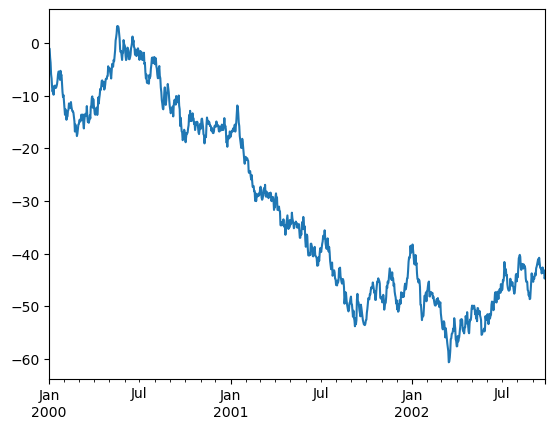

In [71]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

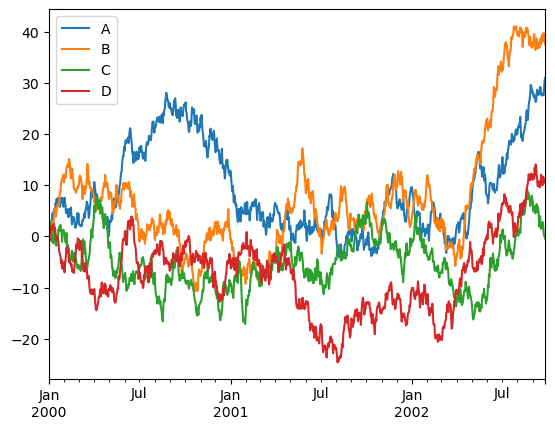

In [72]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')